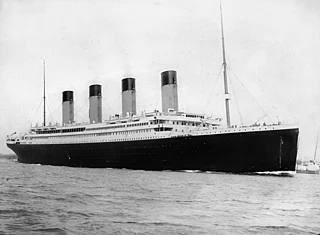

# 1 Introduction
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15th, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to work to answer the question: “what sorts of people were more likely to survive?” using data about the passengers on board.

## 1.1 Data
We have been given a dataset that includes passenger information such as name, age, gender, socio-economic class, etc. for a sample of the passengers onboard (668 passengers to be exact). Importantly for your analysis, this dataset also reveals whether these passengers survived or not.

### 1.1.1 Read in the data
Execute the following code by selecting the cells below and using Cntrl + Enter, or my using Run > Run Selected Cells in the top menu.

In [ ]:
!apt-get install git
!git clone https://github.com/chloewoods/insights-week

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Cloning into 'insights-week'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (26/26), 506.61 KiB | 7.56 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [6]:
%cd insights-week/python
!pwd

/content/insights-week/python
/content/insights-week/python


In [7]:
from importlib import reload
import data
reload(data)
from data import *

You can always reset the data at any time by re-running this cell.


### 1.1.2 Data dictionary

We have been given a dictionary and some extra information so that we can interpret the meaning of this data.

Each row in the data represents one passenger.

Column    | Definition
:---        | :---
PassengerId | Unique ID for the passenger.
Survived    | Whether the passenger survived; 0=No, 1=Yes.
Pclass      | The passenger's ticket class; 1=Upper, 2=Middle, 3=Lower. This is a proxy for socio-economic status.
Name        | The passenger's name.
Sex         | The passenger's sex.
Age         | The passenger's age in years. When the passenger is younger than one year old, then the age is fractional. If the age is unknown but estimated then it is of the form "n.5", for example "15.5" indicates an estimated passenger age of 15.
Ticket      | The passenger's ticket number.


# 2 Data Exploration

Let's take a look at first 5 rows of the data by running the cell below.

In [ ]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket
0,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,PC 17611
1,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,330958
2,620,0,2,"Gavey, Mr. Lawrence",male,26.0,31028
3,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,36973
4,60,0,3,"Goodwin, Master. William Frederick",male,11.0,CA 2144


To guide and structure your analysis into this data, we'll pose some questions like the one below. Often this will require writing some code or drawing some conclusions from the data.

Remember you can seek the help of the D3 instructors at any time, but at least try to give the questions an initial attempt first.


_**Question 1**:
Is this sample of 668 passengers representative of the total population (i.e. all passengers on the Titanic)? In other words, is the survival rate of this sample similar to the survival rate of the entire population?_

**Some Guidance**

 - What is the survival rate of the total population? Reading the introduction should help find this information.
 - To find the total of a given numeric column, you can use the `sum()` function as follows.
   ```python
sum(passengers["column_name"])
   ```
 - You can add more cells if you need them by clicking the "+" icon.

In [ ]:
# Cell intentionally left empty for your solution to question 1.

## 2.1 Correlation

Ultimately we want to find some variables/columns in the data that are correlated with whether the passenger survived or not. For example, we may see that older passengers were less likely to survive.


### 2.1.1 Numerical Variables

Some variables, such as Pclass, are numerical. The Seaborn package provides an easy way of plotting this information to graphically examine the variable for any correlation to survival rate. Seaborn comes with extensive documentation available at  <http://seaborn.pydata.org/index.html>.

In [ ]:
import seaborn

In [ ]:
seaborn.relplot(x="Pclass", y="Survived", data=passengers, kind="line", errorbar=None)

_**Question 2**:
What does this plot suggest about the correlation between socio-economic status and a passenger's chance of survival?_

In [ ]:
# Cell intentionally left empty for your answer to question 2.

We can conduct a similar investigation into the Age variable.

Creating the same kind of plot as the one above but for age (i.e. survival rate against age) produces the following.

In [ ]:
seaborn.relplot(x="Age", y="Survived", data=passengers, kind="line", errorbar=None)

_**Question 3**:
Why is this graph hard to interpret?_

In [ ]:
# Cell intentionally left empty for your answer to question 3.

To make the relationship between age and survival rate clearer, we can plot the distribution of ages with respect to whether passengers survived or not. Like before, Seaborn makes this kind of plotting simple.

In [ ]:
seaborn.displot(passengers, x="Age", hue="Survived", kind="kde")

_**Question 4**:
What does this plot suggest about the correlation between age and surivability?_

In [ ]:
# Cell intentionally left empty for your answer to question 4.

### 2.1.2 Categorical Variables

Some columns contain discrete factors, meaning that each row will take one of a few predetermined values for that variable. Such variables are called categorical. For example, we know that the Sex column can take the values "female" or "male".

We can do some simple aggregation to start to describe the relationship between sex and survivability.

In [ ]:
passengers.groupby("Sex")["Survived"].mean().reset_index(name="survival_rate")

_**Question 5**:
What does this aggregation suggest about the relationship between a passenger's sex and their survivability?_

In [ ]:
# Cell intentionally left empty for your answer to question 5.

_**Question 6**:
Does it make sense to perform aggregations like this for any of other variables in the passengers dataset? Are there other aggregations other than the mean that you would want to calculate for each category? If so, go ahead and produce them below. You can use the code above as a guide._

In [ ]:
# Cell intentionally left empty for your solution to question 6.

## 2.2 Joins

In addition to the passenger dataset, we've been given two other datasets that might be helpful to examine.

### 2.2.1 Family Info

This dataset contains information about other family members that each passenger also had aboard the Titanic.

Column      | Definition
:---        | :---
PassengerId | Unique ID for the passenger.
SibSp       | Number of siblings/spouses the passenger had aboard the Titanic. Siblings include brothers, sisters, stepbrothers, and stepsisters. Spouses include husbands and wives, but not mistresses or fiances.
Parch       | Number of parents/children the passenger had aboard the Titanic. Parents include mothers and fathers. Children include daughters, sons, stepdaughters, and stepsons. Children travelling with only a nanny have Parch=0.

In [ ]:
family_info.head()

However, this dataset, by itself, gives no indication as to whether the passenger survived or not. Therefore, for it to be useful for our purposes of examining which variables correlate with survival rate, it needs to be paired with the existing passengers dataset.

As you can see, both the family info and passengers datasets contain the PassengerId variable, meaning that a connection between them should be possible.

The Pandas package makes common data manipulation tasks such as joining two datasets together really easy. We can use the `.merge()` method to connect the passengers dataset to the new family info dataset. See <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html> for more information.

In [ ]:
passengers_and_family_info = passengers.merge(family_info, on="PassengerId", how="inner")
passengers_and_family_info.head()

_**Question 7**:
Are there any conclusions we can draw regarding correlation between these additional columns (SibSp and Parch) and the survival rate of passengers?_

In [ ]:
# Cell intentionally left empty for your solution to question 7.

### 2.2.2 Tickets

This dataset contains information about the tickets that passengers held. Each row represents one ticket and gives information such as the cabin assigned to the ticket and the port the passenger embarked from. The expectation is that each passenger will have a ticket, but that multiple passengers may share a single ticket.

Column   | Definition
:---     | :---
Ticket   | The passenger's ticket number.
Fare     | The passenger's fare.
Cabin    | The cabin the passenger traveled in.
Embarked | The port the passenger embarked from; C=Cherbourg, Q=Queenstown, S=Southampton.

In [ ]:
tickets.head()

To merge this with the `passengers_and_family_info` dataset, we might be tempted to copy-paste the same process as given in 2.2.1.

In [ ]:
len(passengers_and_family_info)

However, notice that the number of rows in the resulting dataset has shrunk!

In [ ]:
complete_df = passengers_and_family_info.merge(tickets, on="Ticket", how="inner")
len(complete_df)

_**Question 8**:
Why is `len(complete_df)` < `len(passengers_and_family_info)`?_

In [ ]:
# Cell intentionally left empty for your answer to question 8.

_**Question 9**:
Can you modify the merge in the cell above so that the resulting dataset is the same size as `passengers_and_family_info`?_

In [ ]:
# Cell intentionally left empty for your solution to question 9.

_**Question 10**:
Are there any conclusions we can draw regarding the correlation between these additional columns (Fare, Cabin, and Embarked) and the survival rate of passengers?_

In [ ]:
# Cell intentionally left empty for your solution to question 10.

# 3 Data Manipulation

## 3.1 Null Imputation

From observing the data above, we can see odd `NaN` values in the Cabin column. This is Panda's way of representing missing or invalid data. However, there may be other columns that have missing data that we haven't been able to spot in the small samples given so far. We need to check!

In [ ]:
complete_df.isnull().sum()

Depending on what we want to use this data for, it may be better to replace these `NaN` values with more meaningful/standard values. This process is called "Null Imputation".

For example, let's take a closer look into the Embarked column, counting the number of (non-null) occurrences of each value this variable can take.

In [ ]:
complete_df.groupby("Embarked").size()

By far the most popular location for passengers to embark from was Southampton. Therefore, it may be reasonable for us to guess that the passengers with missing Embarked information actually boarded in Southampton too.

We can go ahead and make that change to our dataset.

In [ ]:
complete_df = complete_df.fillna({"Embarked": "S"})
complete_df["Embarked"].isnull().sum()

In general, there are many strategies available for performing null imputation.

In some cases, it's appropriate to set null values to some discrete value that's unrelated to the observed values in that variable. For example, we may decide to fill `NaN` in the Age column with -1 (minus one). This would ensure that the data type of the imputed value does not clash with the types of the recorded values that already exist in the column. It would also be easy to identify, after the imputation has occurred, which values have been imputed since -1 is not a legitimate age and therefore we would never expect actual observations to have age of -1.

_**Question 11**:
What potentially harmful side-effects might arise after imputing nulls to -1 in the age variable?_

In [ ]:
# Cell intentionally left empty for your answer to question 11.

In other cases, it's appropriate to set the null values to some calculated value that adequately generalises to the rest of the observed cases. For example, in the case of the Embarked column, we set `NaN` values to the mode of the observed values in the variable.

In other cases, it's appropriate not to perform null imuputation at all, in order to preserve the fact that the data is indeed missing. Doing so may allow for additional inferrences that may be missed if we filled in the `NaN` values. For example, we may hypothesise that the reason for the missing Embarked information above is due to the fact that these passengers were actually crew and therefore didn't embark along with the normal passengers. If this theory is true, then filling the `NaN` values with "S" like we did above would be misleading and potentially remove any ability to identify crew from passengers.

At the end of the day, what you decide to do (or not do) with missing data is a choice that you have to make based on what you know about the data already, your knowledge or assumptions regarding the reason for the missing data, and an appreciation for what the data is being used for.

_**Question 12**:
Can you suggest suitable strategies for null imputation (which may include to leave the nulls as they are and not impute them) for the remaining columns that contain `NaN` values? If you decide to impute nulls in these columns, go ahead and perform that below._

**Some Guidance**

 - To find the mean of a variable, you can execute the following `complete_df["column_name"].mean()`
 - To find the median of a variable, you can execute the following `complete_df["column_name"].median()`

In [ ]:
# Cell intentionally left empty for your solution to question 12.

## 3.2 Feature Engineering

Consider the Cabin variable.

In [ ]:
complete_df["Cabin"].head(10)

In [ ]:
complete_df["Cabin"].isna().sum()

In [ ]:
complete_df["Cabin"].nunique()

We have two problems with that column in its current form.

 1. The data is sparse; assuming you decided not to perform null imputation on it in question 12, the majority of the rows have no data available for this variable.
 2. When the variable is populated, it is often a unique value specific to one individual passenger.

We would like some way to extract any useful information from this column.

According to <https://www.encyclopedia-titanica.org/cabins.html>, the alphabetical prefix that we see on the passenger's cabin corresponds to deck where the cabin resided. For example, cabin "C83" was on deck C. This may be helpful information to extract since we might suspect that passengers on lower decks were less able to reach the available lifeboats and would be affected soonest by the rising waters as the ship sank.

In [ ]:
def find_deck(row):
    """Extract the deck from a passenger's cabin."""
    cabin = row["Cabin"]

    # If cabin isn't a string (i.e. is NaN) then return 'Unknown'.
    if not(isinstance(cabin, str)):
        return "Unknown"

    # Remove any leading & trailing white space from the string.
    cabin = cabin.strip()

    # Deck is the first character of the string.
    deck = cabin[0]

    return deck

In [ ]:
complete_df["Deck"] = complete_df.apply(find_deck, axis=1)
complete_df.head(10)

Let's explain what's going on here since understanding this process may prove useful later.

```python
complete_df["Deck"] = complete_df.apply(find_deck, axis=1)
```

This creates a new column in the complete_df dataset called Deck based on the outcome of the `complete_df.apply(find_deck, axis=1)` which is running/applying the function `find_deck()` on the complete_df dataset. Since `axis=1` here, the function `find_deck()` is being applied to every row of the dataset. If `axis=0`, the function would have been applied to every column.

The `find_deck()` function is defined in terms of a single row, and manipulates the Cabin column in that row to return the desired deck information if possible. Indeed, it begins by checking if the cabin is populated with information and if it is not, it returns an explanatory "Unknown" for the deck information. After removing any leading or trailing spaces from the cabin information, it then returns the first character from the cabin.

We can think of this `find_deck()` function in terms of example inputs and outputs.

Input row                   | Output
:---                        | :---
`..., Cabin=NaN, ...`       | Unknown
`..., Cabin="A123", ...`    | A
`..., Cabin="  B 30 ", ...` | B

Performing tasks such as this, where we create a new variable based on the information found in one or more existing variables is commonly called "Feature Engineering".

Time to test our original theory by checking for correlation between the new deck variable and the "Survived" variable.

In [ ]:
top_to_bottom_decks = ["Unknown", "A", "B", "C", "D", "E", "F", "G", "T"]
seaborn.catplot(x="Deck", y="Survived", data=complete_df, kind="bar", order=top_to_bottom_decks, errorbar=None)

_**Question 13**:
What does this plot suggest about the correlation between the passenger's deck and their survival rate? Does it prove or disprove our theory?_

In [ ]:
# Cell intentionally left empty for your answer to question 13.

The lowermost decks, G and T are very interesting since it seems that everyone in deck G survived yet everyone in deck T perished.

_**Question 14**:
What might be the cause of this odd behaviour observered in the two lowest decks?_

In [ ]:
# Cell intentionally left empty for your answer to question 14.

_**Question 15**:
The survival rate for passengers with "Unknown" deck information is significantly lower than the survival rate of passengers for which we can engineer deck information. What might be the reason for this?_

In [ ]:
# Cell intentionally left empty for your answer to question 15.

# 4 Make predictions

So far we've made a number of interesting observations about the data and the factors that seem to impact the passenger's chance of survival. Let's put some of them to the test.

There exist three additional datasets; test_passengers, test_family_info, and test_tickets, containing information about passengers that we have not yet seen or worked with. Unfortunately, we are unaware of whether these passengers survived or not. However, we can approximate, or predict, a passenger's survival based on the characteristics we do know.

For example, one of our first observations was that passengers with lower Pclass were much more likely to survive. Therefore, we could use the Pclass variable for the passengers that we don't have survival information about, to predict whether they survived or not.

One way of doing so is using a statistical model called Logistic Regression. This states that the probability of some event occurring, called $P(x)$ (survival of a passenger in our case) which depends on some variable $x$ (in this example, the passenger's Pclass) is given by the following formula.

$$
P(x) = \frac{1}{1+e^{-\left(x-m\right)/s}}
$$

There are a few noteworthy aspects to this function.

Firstly, constants $m$ and $s$ are introduced. These are known as parameters. The exact values for them are unknown. Machine learning models exist to determine appropriate parameter values that seem to "fit" the observed data well. There is a great deal of skill involved in picking the correct statistical model for the data, determining an appropriate metric to measure the goodness of fit in order to compare one set of parameter values to another set, and narrowing down to the best set of parameters effectively.

For now though, since this type of model is relatively simple, requiring only two parameters to be tuned, we will do so by hand.

Secondly, observe that the function $P(x)$ is monotonically increasing, meaning that bigger values of $x$ always lead to bigger values of $P(x)$. Indeed, we can show this graphically by plotting $P(x)$ for some range of $x$ values and where $m=0$, and $s=1$.

In [ ]:
import math
example_p = {
    "x": range(-5,6),
    "P(x)": [1/(1+math.exp(-1*x)) for x in range(-5, 6)]
}
seaborn.lineplot(x="x", y="P(x)", data=example_p)

However, we know from our plot in 2.1.1, that higher Pclass numbers result in lower rate of survival. This is known as an inverse relationship. Recall that Pclass of 1 corresponds with upper class ticket, 2 is middle, and 3 is lower.

Therefore, we want higher values of a passenger's Pclass ($x$) to result in lower values of $P(x)$. Fortunately, it is easy to transform Pclass to make it a direct relationship with a passenger's survival rate (so that higher Pclass values correspond with higher survival rates). We just take the reciprocal of Pclass, or $\frac{1}{\text{Pclass}}$.

In [ ]:
complete_df["reciprocal(Pclass)"] = 1/complete_df["Pclass"]
complete_df.groupby(["Pclass", "reciprocal(Pclass)"])["Survived"].mean()

Great! Now we can see the desired direct relationship; higher values of reciprocal(Pclass) have higher survival rates. Therefore, higher reciprocal(Pclass) values should have higher predicted survival probabilities for passengers for whom the outcome of the disaster is unknown.

The final observation is that the $P(x)$ values are probabilities of survival, meaning that they are real numbers between 0 and 1. While this can be helpful for some situations, for example, if we wanted to determine if one passenger was more likely to survive than another, in this case we actually want to be able to predict a passengers survival (a discrete 1 or 0) rather than their probability of survival. An easy way of doing this is to just round the probabilities such that any < 0.5 become 0 and ≥ 0.5 become 1.

In the following code, a new column called prediction is added to test_passengers using the $P(x)$ fomula above, rounded, using the $m$ and $s$ values given below, with the reciprocal on the Pclass variable applied.

In [ ]:
import numpy

In [ ]:
m = 0.2
s = 0.5

In [ ]:
test_passengers["prediction"] = (1 / (1 + numpy.exp(-1 * (((1 / test_passengers["Pclass"]) - m) / s)))).round()

In [ ]:
test_passengers.head()

I have provided the `percent_correct()` function below which will calculate how well your predictions match with the actual truth of what happened to these passengers. It will return what percent of the predictions were correct, between 0 (meaning none were correct) and 1 (meaning all were correct).

In [ ]:
percent_correct(test_passengers)

Can you do better? See if you can tweak the values of $m$ and $s$ above to get more accurate predictions.

Below is a list of some further ideas that might be interesting to attempt, along with your own.

**General ideas**

1. At the moment, $P(x)$ depends only on the passenger's Pclass. Instead of calculating the $P(x)$ for every passenger, could we calculate $P(x)$ for all three possible Pclass values? If our logistic regression model model was fit perfectly, what should the values of $P(x)$ for each Pclass approximate?
2. What is the maximum accuracy that is possible to achieve using logistic regression on the Pclass variable?
3. Is it possible to recreate the prediction using if-else logic, perhaps by applying a function like we did in 3.2?
4. It's possible to apply the $P(x)$ calculation to the complete_df dataset which contains passengers for whom we know the survive/did not survive outcome. Doing so would allow a deeper analysis into what types of passengers the predictions could be improved for. For example, is the prediction less accurate for children? Or how accurate is the prediction for males vs. females? This information could inform what direction our modelling needs to take in order to be more accurate.
    1. What potentially dangerous side effect may arise from over-analysing the predictions made for complete_df?
    2. How could we prevent or reduce the risk of this side effect?
5. Can you apply logistic regression to any other variables other than Pclass? Does the use of any other column improve the overall prediction accuracy? Remember that we have more than just the columns inside the test_passengers dataset available to make predictions; we also have test_family_info and test_tickets, but using them requires joining as described in 2.2.
6. Logistic regression expects $x$ values to be numeric. How can you deal with non-numeric variables to predict if a passenger survived or not?
7. Are there strategies for making predictions using more than just one variable? For example, we also know from previous analysis that females had significantly higher survival rates than males. How could we use both Pclass and Sex variables to come up with a prediction?

**Some feature engineering ideas**

The following _may_ produce variables that can be shown to correlate with the survival rate of passengers, and therefore could be included in the formula for your predictions.

8. The SibSp and Parch columns could be used to create a boolean indicator telling us if the passenger was travelling alone or not.
9. The passenger's surname could be extracted from the Name column.
10. The passenger's title (e.g. Mr., Miss., etc.) could be extracted from the Name column.
11. The result of (10) could be used to determine the passenger's marital status.
12. The combination of (9), (10), and SibSp could be used to determine if the passenger is travelling with their spouse.
13. Are there any other family connections that we can make within the data?
14. Does binning the Age variable allow for an improvement in prediction accuracy? For example, engineering an "adult" variable for the data, an "over 50" variable, and so on. Are there other variables that we could bin?
15. Considering the Titanic deck plans <https://www.encyclopedia-titanica.org/titanic-deckplans/>, is there more information we can extract from the passenger's Cabin variable?

**Other areas to investigate**

16. What impact on the prediction accuracy, if any, can be observed if you changed some of your null imputation strategies from question 12?
17. Is there anything noticeably different about the passengers with estimated age? I.e. those with Age in n.5 format.
18. What information can we extract from the passenger's Ticket variable?
19. How would you explain how your predictions were calculated to someone from a non-technical background?
20. If you were aboard the Titanic when it sank, what would be your probability of surviving?
21. Are there other pieces of data outside of the passenger, family info and ticket datasets provided, that might be helpful to improve your prediction?
22. Instead of tuning the parameters of a statistical model by hand, can we apply machine learning to this problem and allow an algorithm to "learn" the correlations in the data and make predictions? For example, can you replicate the logistic regression model demonstrated here, but using machine learned parameters? See <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html> as a starting point.
    1. How does the accuracy of a machine learning model compare to your best prediction formula?